# Работа с файлами
## Открытие файлов
Для начала работы с файлом, его надо открыть.
Для открытия файлов, чаще всего, используется функция `open`:

In [ ]:
file = open('file_name.txt', 'r')

В функции `open()`:
*   `'file_name.txt'` - имя файла
*   тут можно указывать не только имя, но и путь (абсолютный или относительный)
*   `'r'` - режим открытия файла

### Список режимов доступа
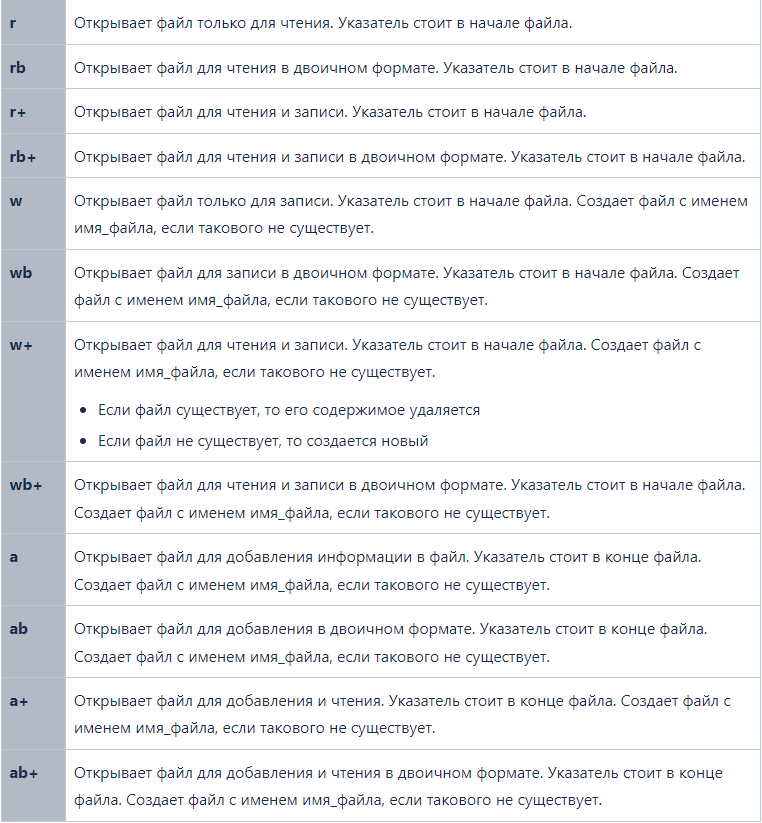

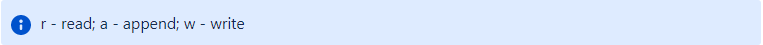

## Аттрибуты работы с файлами
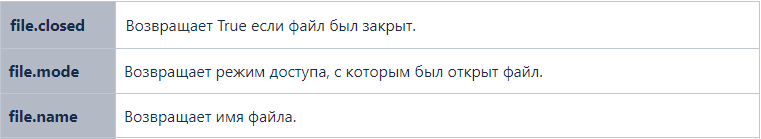


In [ ]:
my_file = open("file_name.txt", "w")
print("File name: ", my_file.name)
print("Is file closed: ", my_file.closed)
print("File using regime: ", my_file.mode)

File name:  file_name.txt
Is file closed:  False
File using regime:  w


Также информацию о файле можно вывести следующим образом:

In [ ]:
my_file = open("file_name.txt", "r")
print(my_file) # выводим объект

<_io.TextIOWrapper name='file_name.txt' mode='r' encoding='UTF-8'>


## Чтение файлов
В Python есть несколько методов чтения файла:
*   `read` - считывает содержимое файла в строку
*   `readline` - считывает файл построчно
*   `readlines` - считывает строки файла и создает список из строк


### **`read`**
Метод `read` - считывает весь файл в одну строку.

In [ ]:
my_file = open('some.txt')
my_file.read()

'Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nam molestie porttitor sem nec fringilla. Suspendisse potenti. Proin vestibulum venenatis nunc. Sed accumsan magna et malesuada porta.\nNullam ac erat suscipit, dapibus lectus ac, placerat arcu. Nulla sed diam velit. Ut nisl elit, pellentesque ac sollicitudin vitae, feugiat sed risus. Duis gravida non est at volutpat.'

Также можно использовать необязательный параметр `count` - это количество байт, которые следует прочитать из открытого файла. Метод `read` читает информацию с начала файла и, если параметр `count` не указан, до конца файла.

In [ ]:
my_file = open("some.txt")
my_string = my_file.read(11) #считываем лишь 11 символов
print(my_string)
my_file.close()

Lorem ipsum


### **`readline`**
Построчно файл можно считать с помощью метода `readline`:

In [ ]:
my_file = open('some.txt')
my_file.readline()
my_file.readline()
my_file.close()

Но чаще всего проще пройтись по объекту file в цикле, не используя методы `read`:

In [ ]:
my_file = open('some.txt')
for line in my_file:
  print(line)
my_file.close()

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nam molestie porttitor sem nec fringilla. Suspendisse potenti. Proin vestibulum venenatis nunc. Sed accumsan magna et malesuada porta.

Nullam ac erat suscipit, dapibus lectus ac, placerat arcu. Nulla sed diam velit. Ut nisl elit, pellentesque ac sollicitudin vitae, feugiat sed risus. Duis gravida non est at volutpat.


### **`readlines`**
Еще один полезный метод - `readlines`. Он считывает строки файла в список:

In [ ]:
my_file = open('some.txt')
my_file.readlines()
my_file.close()

Если нужно получить строки файла, но без перевода строки в конце, можно воспользоваться методом `split` и как разделитель, указать символ `\n`:

In [ ]:
my_file = open('some.txt')
my_file.read().split('\n')
my_file.close()

### **`seek`**
До сих пор, файл каждый раз приходилось открывать заново, чтобы снова его считать. Так происходит из-за того, что после методов чтения, курсор находится в конце файла. И повторное чтение возвращает пустую строку.

Чтобы ещё раз считать информацию из файла, нужно воспользоваться методом `seek`, который перемещает курсор в необходимое положение.

С помощью метода `seek` можно перейти в начало файла (0 означает начало файла). После того как с помощью `seek` курсор был переведен в начало файла, можно опять считывать содержимое: 

In [ ]:
my_file = open('some.txt')
print(my_file.read()) #первый раз выводим содержимое
print(my_file.read()) #второй раз пробуем вывести содержимое, но ничего не выводится
my_file.seek(0)
print(my_file.read()) #в третий раз выводим содержимое, получается, так как курсор вернули в начало
my_file.close()

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nam molestie porttitor sem nec fringilla. Suspendisse potenti. Proin vestibulum venenatis nunc. Sed accumsan magna et malesuada porta.
Nullam ac erat suscipit, dapibus lectus ac, placerat arcu. Nulla sed diam velit. Ut nisl elit, pellentesque ac sollicitudin vitae, feugiat sed risus. Duis gravida non est at volutpat.

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nam molestie porttitor sem nec fringilla. Suspendisse potenti. Proin vestibulum venenatis nunc. Sed accumsan magna et malesuada porta.
Nullam ac erat suscipit, dapibus lectus ac, placerat arcu. Nulla sed diam velit. Ut nisl elit, pellentesque ac sollicitudin vitae, feugiat sed risus. Duis gravida non est at volutpat.


### **`tell`**
Для того чтобы узнать позицию указателя можно использовать метод `tell()`.

In [ ]:
my_file = open("some.txt")
my_file.read(10)
print ("On position:", my_file.tell())
my_file.close()

On position: 10


Говоря проще, метод `tell()` сообщает в скольких байтах от начала файла мы сейчас находимся.

## Закрытие файлов
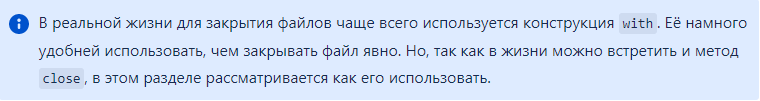


Выше я в каждом примере программы использовал метод `close()`, но что это за он? После того, как мы закончили операции с файлом, необходимо его закрыть. Закрывать файлы после работы важно, чтобы не тратить ресурсы памяти и чтобы данные из файла не потерялись. В некоторых случаях Python может самостоятельно закрыть файл. Но лучше на это не рассчитывать и закрывать файл явно. Делается это с помощью операции close. После этого операции с файлом выполняться не будут, вместо этого мы увидим ошибку.

### **`close`**
Метод `close` также будет встречаться в разделе **запись файлов**. Там он нужен будет для того, чтобы содержимое файла было записано на диск. Для этого, в Python есть отдельный метод **`flush`**. Но так как в примере с записью файлов, не нужно было больше выполнять никаких операций, файл можно будет просто закрыть.

У объекта `file` есть специальный атрибут `closed`, который позволяет проверить, закрыт файл или нет. Если файл открыт, он возвращает `False`:

In [ ]:
my_file = open("some.txt")
my_file.closed

False

Теперь закрываем файл и снова проверяем `closed`:

In [ ]:
my_file.close()
my_file.closed

True

Если попробовать прочитать файл, возникнет исключение:

In [ ]:
my_file.read()

ValueError: ignored

## Запись файлов
При записи, очень важно определиться с режимом открытия файла, чтобы случайно его не удалить:


*   `w` - открыть файл для записи. Если файл существует, то его содержимое удаляется
*   `a` - открыть файл для дополнения записи. Данные добавляются в конец файла

При этом оба режима создают файл, если он не существует.

Для записи в файл используются такие методы:


*   `write` - записать в файл одну строку
*   `writelines` - позволяет передавать в качестве аргумента список строк






### **`write`**
Метод `write` ожидает строку, для записи.

Для примера, возьмем список строк с конфигурацией:


In [ ]:
lines = ['Lorem ipsum dolor sit amet, consectetur adipiscing elit.',
  'Donec nec est eu justo maximus pretium.',
  'Phasellus feugiat eu elit nec venenatis.',
  'Proin tempor eleifend venenatis.',
  'Duis hendrerit porta neque, nec suscipit sapien interdum et.',
  'Donec vitae sapien id ante viverra consectetur non accumsan nunc.']

Открытие файла file.txt в режиме для записи:

In [ ]:
my_file = open("file.txt", 'w')

Преобразуем список предложений в одну большую строку с помощью `join` и запишем строки в файл:

In [ ]:
lines_as_string = '\n'.join(lines)
my_file.write(lines_as_string)

297

Аналогично можно добавить строку вручную:

In [ ]:
my_file.write('\nCurabitur iaculis feugiat aliquet.')

35

После завершения работы с файлом, его необходимо закрыть:

In [ ]:
my_file.close()

### **`writelines`**
Метод `writelines` ожидает список строк, как аргумент.

Запись списка строк lines в файл:

In [ ]:
lines = ['Lorem ipsum dolor sit amet, consectetur adipiscing elit.',
  'Donec nec est eu justo maximus pretium.',
  'Phasellus feugiat eu elit nec venenatis.',
  'Proin tempor eleifend venenatis.',
  'Duis hendrerit porta neque, nec suscipit sapien interdum et.',
  'Donec vitae sapien id ante viverra consectetur non accumsan nunc.']
my_file = open("file.txt", 'w')
my_file.writelines(lines)
my_file.close()

В результате все строки из списка записались в одну строку файла, так как в конце строк не было символа `\n`.

Добавить перевод строки можно по-разному. Например, можно просто обработать список в цикле:

In [ ]:
lines2 = []

for line in lines:
  lines2.append(line + '\n')

## Конструкция with
Конструкция `with` называется менеджер контекста.

В Python имеется аккуратно встроенный инструмент, применяя который вы можете заметно упростить чтение и редактирование файлов. Оператор with создает диспетчер контекста в Пайтоне, который автоматически закрывает файл для вас, по окончанию работы в нем. Обратите внимание на то, как считываются строки файла:

In [ ]:
with open('some.txt', 'r') as my_file:
  for line in my_file:
    print(line)

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nam molestie porttitor sem nec fringilla. Suspendisse potenti. Proin vestibulum venenatis nunc. Sed accumsan magna et malesuada porta.

Nullam ac erat suscipit, dapibus lectus ac, placerat arcu. Nulla sed diam velit. Ut nisl elit, pellentesque ac sollicitudin vitae, feugiat sed risus. Duis gravida non est at volutpat.


Кроме того, конструкция `with` гарантирует закрытие файла автоматически.
В предыдущем выводе, между строками файла были лишние пустые строки, так как `print` добавляет ещё один перевод строки.
Чтобы избавиться от этого, можно использовать метод `rstrip`:

In [ ]:
with open('some.txt', 'r') as my_file:
  for line in my_file:
    print(line.rstrip())

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nam molestie porttitor sem nec fringilla. Suspendisse potenti. Proin vestibulum venenatis nunc. Sed accumsan magna et malesuada porta.
Nullam ac erat suscipit, dapibus lectus ac, placerat arcu. Nulla sed diam velit. Ut nisl elit, pellentesque ac sollicitudin vitae, feugiat sed risus. Duis gravida non est at volutpat.


И конечно же, с конструкцией `with` можно использовать не только такой построчный вариант считывания, а все методы, которые рассматривались до этого, также работают:

In [ ]:
with open('some.txt', 'r') as my_file:
  print(my_file.read())

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nam molestie porttitor sem nec fringilla. Suspendisse potenti. Proin vestibulum venenatis nunc. Sed accumsan magna et malesuada porta.
Nullam ac erat suscipit, dapibus lectus ac, placerat arcu. Nulla sed diam velit. Ut nisl elit, pellentesque ac sollicitudin vitae, feugiat sed risus. Duis gravida non est at volutpat.


## Открытие двух файлов

Иногда нужно работать одновременно с двумя файлами. Например, надо записать некоторые строки из одного файла, в другой.

В таком случае, в блоке `with` можно открывать два файла таким образом:

In [ ]:
with open('some.txt') as src, open('file.txt', 'w') as dest:
  for line in src:
    if line.startswith('Lorem'):
      dest.write(line)

## Переименование файлов в Python

### Функция rename()
Функция `rename()` используется для переименовывания файлов в Python. Для ее использования сперва нужно импортировать модуль `os`.

Синтаксис следующий:

```
import os
os.rename(src,dest)
```
Где,


*   `src` - файл, который нужно переименовать
*   `dest` - новое имя файла

Пример:

In [ ]:
import os
# переименование fle_name.txt в abc.txt
os.rename("file_name.txt","abc.txt")

**После выполнения этого кода первый пример на странице работать не будет, так как файла file_name.txt больше нет.**

## Методы для работы в Python
Подводя итог, приведу таблицу частоиспользуемых методов для работы с файлами в Python.

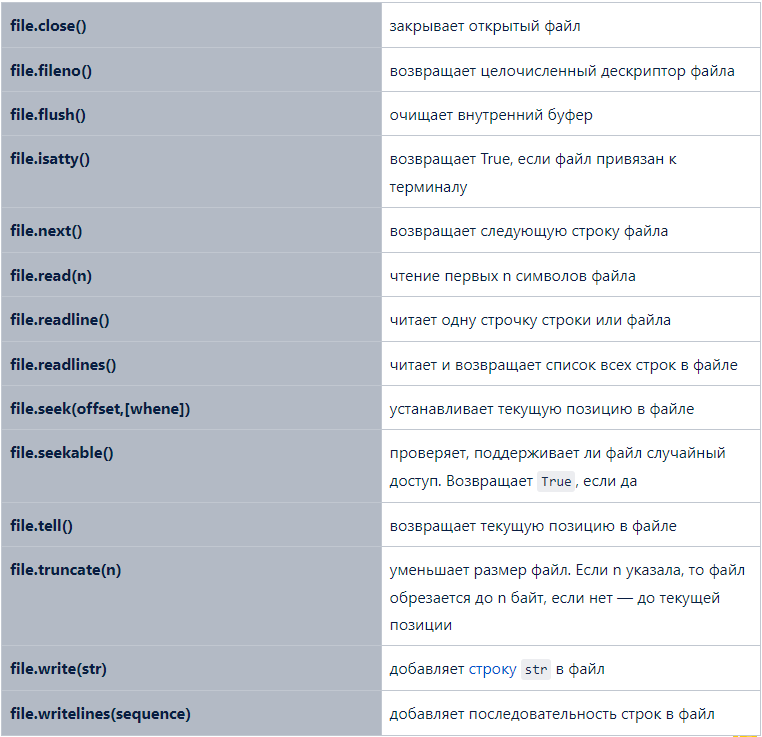

## Выявление ошибок
Иногда, в ходе работы, ошибки случаются. Файл может быть закрыт, потому что какой-то другой процесс пользуется им в данный момент или из-за наличия той или иной ошибки разрешения. Когда это происходит, может появиться `IOError`. В данном разделе мы попробуем выявить эти ошибки обычным способом, и с применением оператора `with`.

In [ ]:
try:
    my_file = open("some.txt")
    for line in my_file:
        print(line)
except IOError:
    print("An IOError has occurred!")
finally:
    my_file.close()

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nam molestie porttitor sem nec fringilla. Suspendisse potenti. Proin vestibulum venenatis nunc. Sed accumsan magna et malesuada porta.

Nullam ac erat suscipit, dapibus lectus ac, placerat arcu. Nulla sed diam velit. Ut nisl elit, pellentesque ac sollicitudin vitae, feugiat sed risus. Duis gravida non est at volutpat.


В описанном выше примере, мы помещаем обычный код в конструкции `try/except`. Если ошибка возникнет, следует открыть сообщение на экране. Обратите внимание на то, что следует удостовериться в том, что файл закрыт при помощи оператора `finally`. Теперь мы готовы взглянуть на то, как мы можем сделать то же самое, пользуясь следующим методом:

In [ ]:
try:
  with open("some.txt") as my_file:
    for line in my_file:
      print(line)
except IOError:
  print("An IOError has occurred!")

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nam molestie porttitor sem nec fringilla. Suspendisse potenti. Proin vestibulum venenatis nunc. Sed accumsan magna et malesuada porta.

Nullam ac erat suscipit, dapibus lectus ac, placerat arcu. Nulla sed diam velit. Ut nisl elit, pellentesque ac sollicitudin vitae, feugiat sed risus. Duis gravida non est at volutpat.


Как вы можете догадаться, мы только что переместили блок `with` туда же, где и в предыдущем примере. Разница в том, что оператор `finally` не требуется, так как контекстный диспетчер выполняет его функцию для нас.